In [3]:
import scipy.io
import numpy as np
import datetime 
import ephem
import random
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib
from astropy.table import Table
import astropy.units as u
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation
import sunpy.coordinates
from datetime import datetime, timezone
from math import atan, atan2, degrees, floor, pi, radians, sin, sqrt
from skyfield.api import earth, JulianDate, now, sun
data=scipy.io.loadmat('BNS-sources-trial-10saleem.mat')['data'] 
#sourceparameters
DL=data[:,0]
theta=data[:,1]
phi=data[:,2]
import pandas as pd

Using matplotlib backend: MacOSX


In [4]:
length = 220000

In [5]:
df = pd.read_csv('/Users/jinaypatel/Desktop/Daksha/Events(triggers).csv')

In [10]:
tt = df.sort_values(by=['Time in isot'])
homotime = tt['Time in jd']

In [9]:
t = np.empty(length,dtype=object)
for i in range(length):
    t[i] = (Time(homotime[i],format='jd'))


In [11]:
homotime = time.reset_index(drop=True) #resetting the index 

In [12]:
line0 = 'ASTROSAT' #Daksha
line1 = '1 40930U 15052A   22302.17850942  .00000772  00000-0  19439-4 0  9990'
line2 = '2 40930   5.9975   0.5159 0009292 339.1937  20.7998 14.76165238112787'
line3 = '2 40930   5.9975   0.5159 0009292 339.1937 200.7998 14.76165238112787'

# line0 = 'SWIFT'#BAT
# line1 = '1 28485U 04047A   22302.18405080  .00001301  00000-0  60140-4 0  9997'
# line2 = '2 28485  20.5572 277.8742 0011565 130.4507 229.6936 15.03911323708409'
# line0 = 'FGRST (GLAST)'#Fermi
# line1 = '1 33053U 08029A   22100.45970249  .00000511  00000-0  12538-4 0  9998'
# line2 = '2 33053  25.5819 140.4060 0012690 120.1881 239.9912 15.11069703542313'
astrosat1 = ephem.readtle(line0,line1,line2)
astrosat2 = ephem.readtle(line0,line1,line3)

alt1 = np.empty(length,dtype=object)
alt2 = np.empty(length,dtype=object)
sublat1 = np.empty(length,dtype = object)
sublong1 = np.empty(length,dtype = object)
sublat2 = np.empty(length,dtype = object)
sublong2 = np.empty(length,dtype = object)
for i in range(length):
    time = (t[i].iso)
    astrosat1.compute(time)
    astrosat2.compute(time)
    alt1[i] = astrosat1.elevation
    alt2[i] = astrosat2.elevation
    sublat1[i] = (astrosat1.sublat)*180/np.pi#sublat in radians
    sublong1[i] = (astrosat1.sublong)*180/np.pi#sublong in radian
    sublat2[i] = (astrosat2.sublat)*180/np.pi#sublat in radians
    sublong2[i] = (astrosat2.sublong)*180/np.pi#sublong in radian

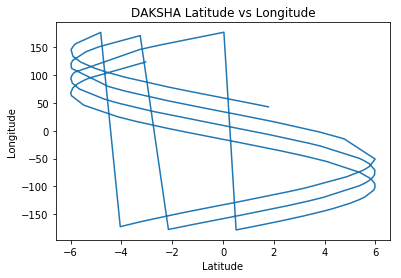

In [13]:
plt.plot(sublat1[0:150],sublong1[0:150])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("DAKSHA Latitude vs Longitude")
plt.savefig("DAK_latvslong.pdf")

In [2]:
sublat1

NameError: name 'sublat1' is not defined

In [131]:
t[150].iso

'2022-01-01 06:06:50.080'